# SE(3) $\mapsto$ SO(3)

$$
v(t) = R(t) * v_0 + p(t) \\
p(t) = (p_1- p_0) * t + p_0 \\
R(t) = \exp((r_1- r_0) * t + r_0) \\
\exp(r) = I + \sin(||r||) / ||r|| * [r] + (2 * (\sin(||r|| / 2)/ ||r||)**2) * [r] * [r] \\
$$

In [1]:
import sympy
import math
import numpy
from scipy.spatial.transform import Rotation
from IPython.display import display, Math, Latex
sympy.init_printing()

In [2]:
angle = sympy.symbols("theta")
axis = numpy.array(sympy.symbols("x y z"))
axis /= angle

In [3]:
def hat(x):
    return numpy.array([[0, -x[2], x[1]], [x[2], 0, -x[0]], [-x[1], x[0], 0]])

array([[0, -z/theta, y/theta],
       [z/theta, 0, -x/theta],
       [-y/theta, x/theta, 0]], dtype=object)

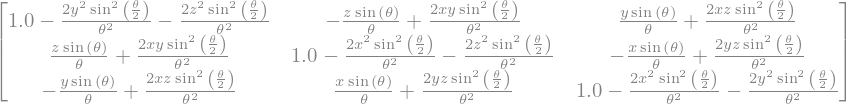

In [4]:
K = hat(axis)
display(K)
R = numpy.eye(3) + sympy.sin(angle) * K + (2 * sympy.sin(angle / 2)**2) * K @ K
display(sympy.Matrix(R))

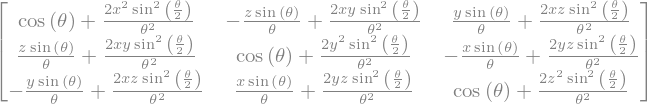

In [5]:
sin_axis = sympy.sin(angle) * axis
c = sympy.cos(angle)
cos1_axis = (2 * sympy.sin(angle / 2)**2) * axis

R = numpy.zeros((3, 3), dtype=sympy.Symbol)
tmp = cos1_axis[0] * axis[1]
R[0, 1] = tmp - sin_axis[2]
R[1, 0] = tmp + sin_axis[2]

tmp = cos1_axis[0] * axis[2]
R[0, 2] = tmp + sin_axis[1]
R[2, 0] = tmp - sin_axis[1]

tmp = cos1_axis[1] * axis[2]
R[1, 2] = tmp - sin_axis[0]
R[2, 1] = tmp + sin_axis[0]

R[[0, 1, 2], [0, 1, 2]] = cos1_axis * axis + c
sympy.Matrix(R)

In [6]:
def norm(x):
    return sympy.sqrt(sum(xi**2 for xi in x))


def rotation_matrix(a):
    angle = norm(a)
    axis = a / angle
    K = hat(axis)
    return numpy.eye(3) + sympy.sin(angle) * K + (2 * sympy.sin(angle / 2)**2) * K @ K

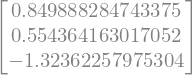

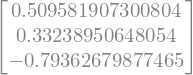

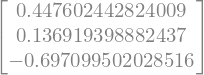

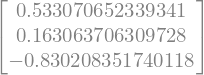

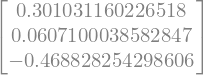

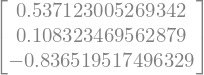

In [10]:
Ri = rotation_matrix(numpy.array([0, 2, 0]))

for i in range(1, 4):
    Rj = rotation_matrix(
        numpy.array([0, 2, 0]) + 1 / i * numpy.array([2, 0, 0]))
    r = Rotation.from_matrix(Rj @ Ri.T)
    display(sympy.Matrix(r.as_rotvec()))
    display(sympy.Matrix(r.as_rotvec() / norm(r.as_rotvec())))

In [11]:
0.83794887019243 / 0.420304419428761

In [12]:
0.0803342823292799 / 0.0198820712857076

In [13]:
-0.457773554147916 / -0.229613350826281

In [14]:
r = Rotation.from_matrix(Rj @ Ri.T)
r.as_rotvec()

array([ 0.30103116,  0.06071   , -0.46882825])

In [17]:
Rotation.from_matrix(
    Rotation.from_rotvec([1, 0, 0]).as_matrix() @ Rotation.from_rotvec(
        [0, 1, 0]).as_matrix().T).as_rotvec()

array([ 0.91251925, -0.91251925, -0.49851154])

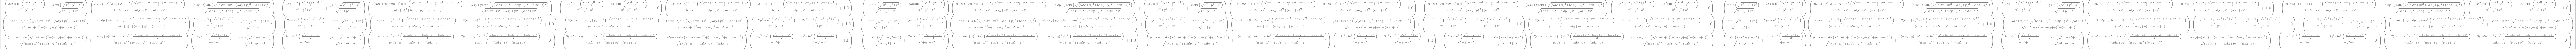

In [23]:
Ri = rotation_matrix(numpy.array(sympy.symbols("x y z")))
alpha = sympy.symbols("alpha")
Rj = rotation_matrix(
    numpy.array(sympy.symbols("x y z")) + alpha * numpy.array(sympy.symbols("dx dy dz")))
sympy.Matrix(Rj @ Ri.T)